## 2.5 Feature correlations
In this notebook we have a loook at the features and their correlation with the target.

In [1]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv', 
                    parse_dates= ['TIMESTAMP'],
                    index_col= 'TIMESTAMP' )


Relationship between ```U100```, ```V100``` and wind power generation

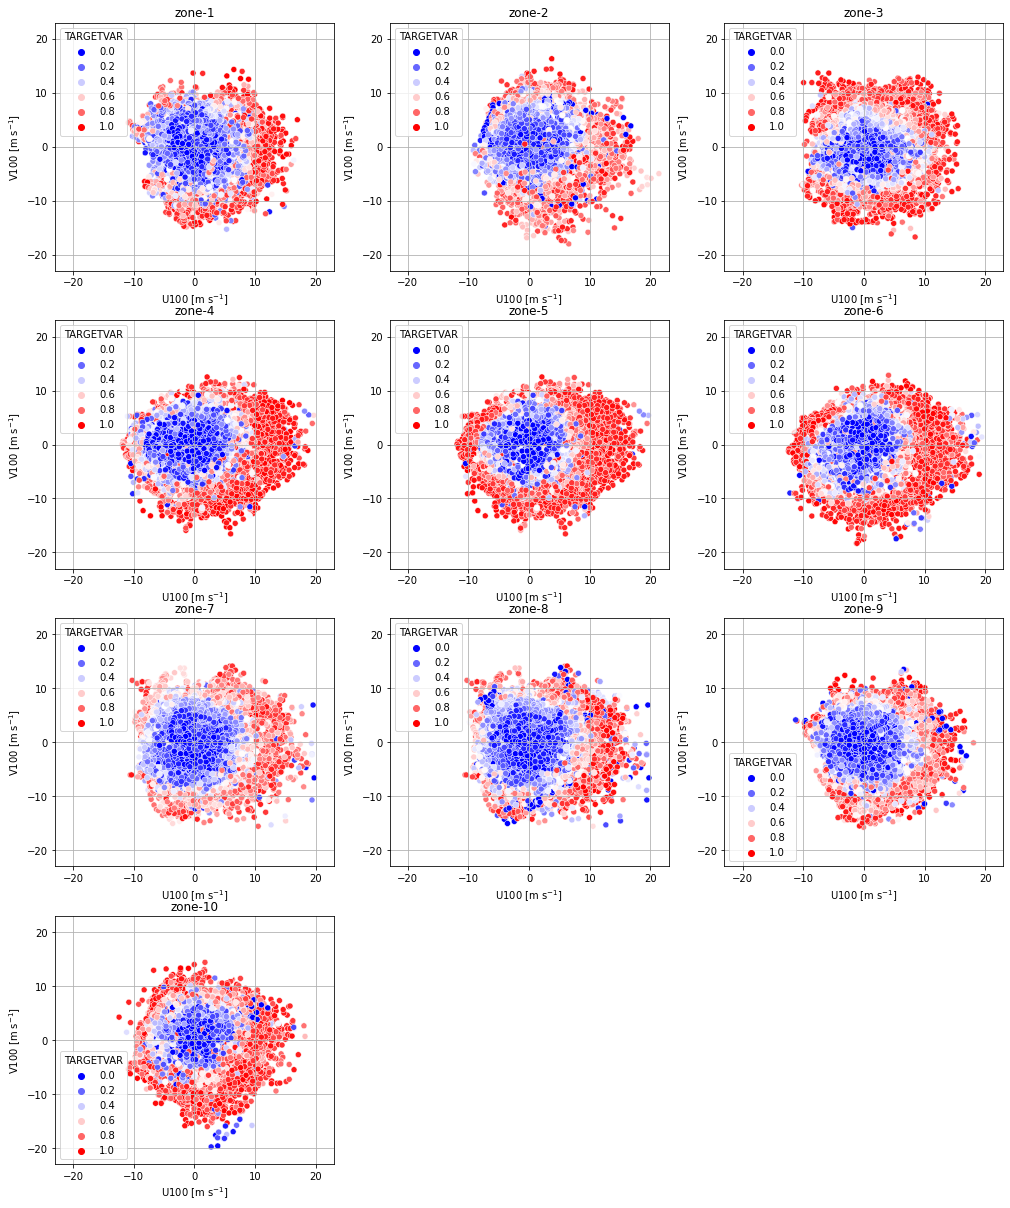

In [3]:
## scatter plots by wind farm: U100-V100-WS100
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(17,21))
ax = np.reshape(ax,4*3)

for i,zone in enumerate(range(1,11)):
    data_temp = df.loc[df['ZONEID']==zone]
    sns.scatterplot(data=data_temp, x='U100', y='V100', hue='TARGETVAR', palette='bwr', ax=ax[i])
    ax[i].set_title('zone-{}'.format(zone))
    ax[i].set_xlabel("U100 $\mathregular{[m\ s^{-1}]}$")
    ax[i].set_ylabel("V100 $\mathregular{[m\ s^{-1}]}$")
    ax[i].set_xlim([-23.,23.])
    ax[i].set_ylim([-23.,23.])
    ax[i].grid()
ax[-1].remove()
ax[-2].remove()

Relationship between ```WS100``` and the wind energy production

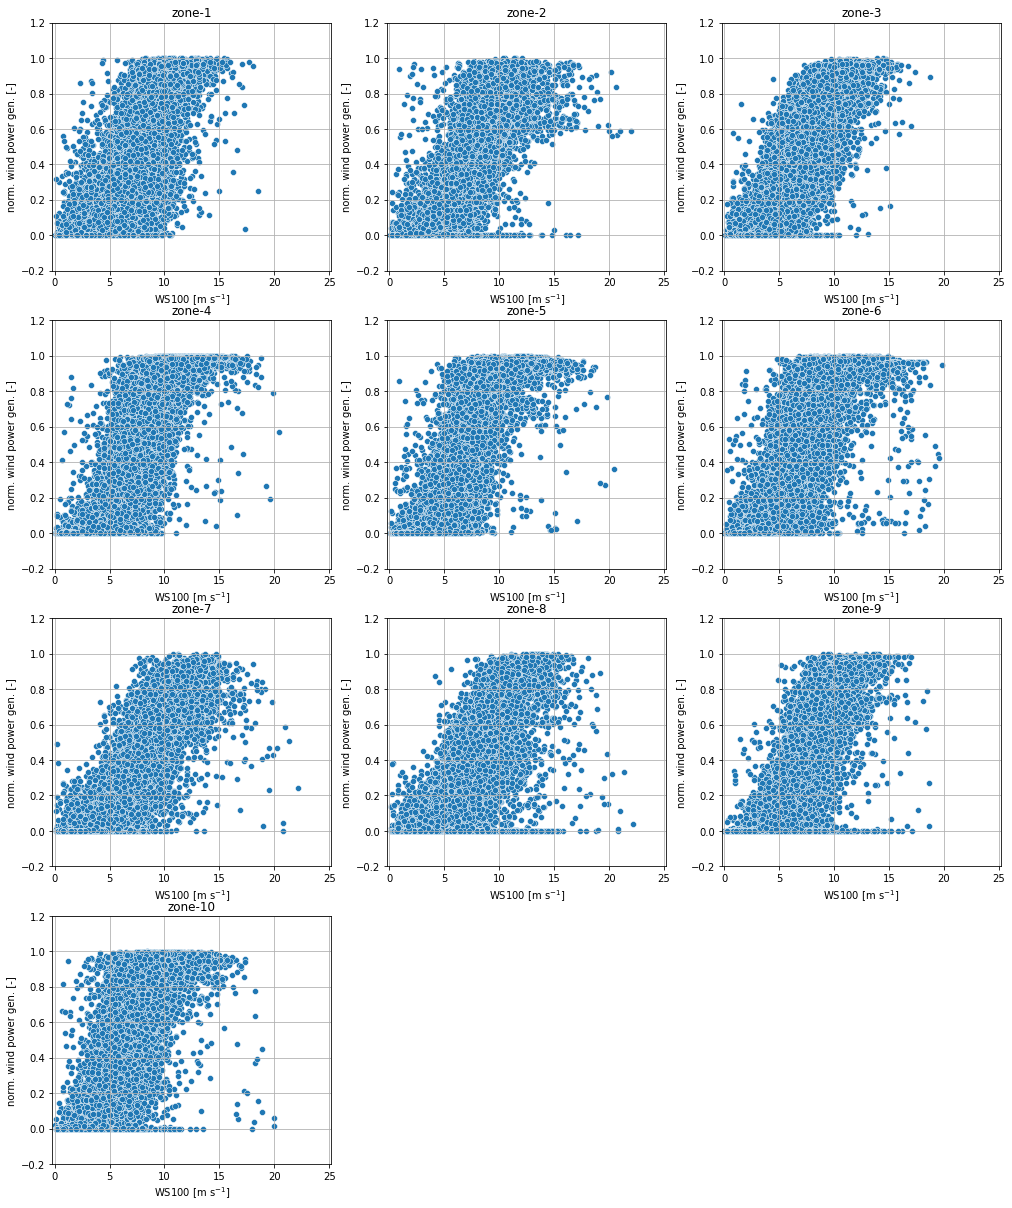

In [4]:
## scatter plots by wind farm: energy production by wind speed in 100 m above ground 
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(17,21))
ax = np.reshape(ax,4*3)

for i,zone in enumerate(range(1,11)):
    data_temp = df.loc[df['ZONEID']==zone]
    sns.scatterplot(data=data_temp, x='WS100', y='TARGETVAR',ax=ax[i])
    ax[i].set_title('zone-{}'.format(zone))
    ax[i].set_xlabel("WS100 $\mathregular{[m\ s^{-1}]}$")
    ax[i].set_ylabel("norm. wind power gen. [-]")
    ax[i].set_xlim([-0.2,25.2])
    ax[i].set_ylim([-0.2,1.2])
    ax[i].grid()
ax[-1].remove()
ax[-2].remove()

Plottig a Heatmap to check the correlations:

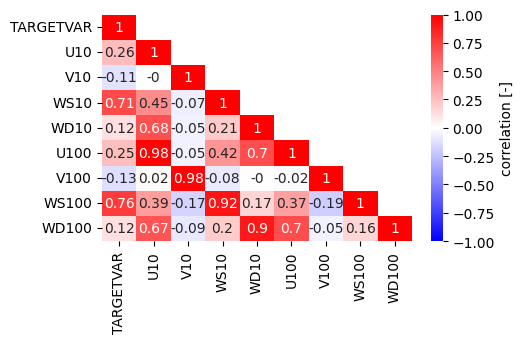

In [5]:
## correlation dataframe
data_temp = df[['TARGETVAR','U10','V10','WS10','WD10','U100','V100','WS100','WD100']].corr()

for row in range(len(data_temp)):
    data_temp.iloc[row,:] = [value if i <= row else np.nan for i,value in enumerate(data_temp.iloc[row,:])]

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
sns.heatmap(data_temp.round(2), cmap='bwr', annot=True, vmin=-1., vmax=1., cbar_kws={'label': 'correlation [-]'}, ax=ax);
fig.savefig('../images/Corr_TARGET_Features.png')

The windspeed at 100m height ```WS100```  has the highest correlation with the target variable.
In notebook ```4_Modeling.ipynb``` when we compare different models, we will find the feature combinations that improve our 
prediction results.